In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ticker = yf.Ticker('AAPL')
df = ticker.history('5y', '1d')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-09-04 00:00:00-04:00,54.688982,54.873343,54.262791,54.677010,109560400,0.0,0.0
2018-09-05 00:00:00-04:00,54.827857,54.990670,53.896461,54.320255,133332000,0.0,0.0
2018-09-06 00:00:00-04:00,54.167015,54.435183,52.986610,53.417591,137160000,0.0,0.0
2018-09-07 00:00:00-04:00,53.118311,53.961114,52.845357,52.986622,150479200,0.0,0.0
2018-09-10 00:00:00-04:00,52.902808,53.118300,51.830147,52.275494,158066000,0.0,0.0


In [3]:
df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [4]:
df['8_ema'] = df['Close'].ewm(span=8, adjust=False).mean()
df['21_ema'] = df['Close'].ewm(span=21, adjust=False).mean()

df.tail()

,Open,High,Low,Close,Volume,8_ema,21_ema
Date,,,,,,,
2023-08-28 00:00:00-04:00,180.089996,180.589996,178.550003,180.190002,43820700,178.381163,180.646289
2023-08-29 00:00:00-04:00,179.699997,184.899994,179.500000,184.119995,53003900,179.656459,180.962081
2023-08-30 00:00:00-04:00,184.940002,187.850006,184.740005,187.649994,60813900,181.432800,181.570073
2023-08-31 00:00:00-04:00,187.839996,189.119995,187.479996,187.869995,60794500,182.863288,182.142793
2023-09-01 00:00:00-04:00,189.490005,189.919998,188.279999,189.460007,45732600,184.329225,182.807994


In [5]:
df['signal'] = np.where(df['8_ema'] > df['21_ema'], 1, -1)

In [6]:
df.tail()

,Open,High,Low,Close,Volume,8_ema,21_ema,signal
Date,,,,,,,,
2023-08-28 00:00:00-04:00,180.089996,180.589996,178.550003,180.190002,43820700,178.381163,180.646289,-1
2023-08-29 00:00:00-04:00,179.699997,184.899994,179.500000,184.119995,53003900,179.656459,180.962081,-1
2023-08-30 00:00:00-04:00,184.940002,187.850006,184.740005,187.649994,60813900,181.432800,181.570073,-1
2023-08-31 00:00:00-04:00,187.839996,189.119995,187.479996,187.869995,60794500,182.863288,182.142793,1
2023-09-01 00:00:00-04:00,189.490005,189.919998,188.279999,189.460007,45732600,184.329225,182.807994,1


In [7]:
df['position'] = df['signal'].replace(to_replace=0, method='ffill')

C:\Users\lklun\AppData\Local\Temp\ipykernel_9856\2025987955.py:1: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['position'] = df['signal'].replace(to_replace=0, method='ffill')


In [8]:
df['position'] = df['position'].shift(1)

In [9]:
df['returns'] = np.log(df['Close'] / df['Close'].shift(1)) * 100
df.tail()

,Open,High,Low,Close,Volume,8_ema,21_ema,signal,position,returns
Date,,,,,,,,,,
2023-08-28 00:00:00-04:00,180.089996,180.589996,178.550003,180.190002,43820700,178.381163,180.646289,-1,-1.0,0.880720
2023-08-29 00:00:00-04:00,179.699997,184.899994,179.500000,184.119995,53003900,179.656459,180.962081,-1,-1.0,2.157583
2023-08-30 00:00:00-04:00,184.940002,187.850006,184.740005,187.649994,60813900,181.432800,181.570073,-1,-1.0,1.899080
2023-08-31 00:00:00-04:00,187.839996,189.119995,187.479996,187.869995,60794500,182.863288,182.142793,1,-1.0,0.117172
2023-09-01 00:00:00-04:00,189.490005,189.919998,188.279999,189.460007,45732600,184.329225,182.807994,1,1.0,0.842775


In [10]:
df.tail()

,Open,High,Low,Close,Volume,8_ema,21_ema,signal,position,returns
Date,,,,,,,,,,
2023-08-28 00:00:00-04:00,180.089996,180.589996,178.550003,180.190002,43820700,178.381163,180.646289,-1,-1.0,0.880720
2023-08-29 00:00:00-04:00,179.699997,184.899994,179.500000,184.119995,53003900,179.656459,180.962081,-1,-1.0,2.157583
2023-08-30 00:00:00-04:00,184.940002,187.850006,184.740005,187.649994,60813900,181.432800,181.570073,-1,-1.0,1.899080
2023-08-31 00:00:00-04:00,187.839996,189.119995,187.479996,187.869995,60794500,182.863288,182.142793,1,-1.0,0.117172
2023-09-01 00:00:00-04:00,189.490005,189.919998,188.279999,189.460007,45732600,184.329225,182.807994,1,1.0,0.842775


In [11]:
df['strat_returns'] = df['position'] * df['returns']
df.tail()

,Open,High,Low,Close,Volume,8_ema,21_ema,signal,position,returns,strat_returns
Date,,,,,,,,,,,
2023-08-28 00:00:00-04:00,180.089996,180.589996,178.550003,180.190002,43820700,178.381163,180.646289,-1,-1.0,0.880720,-0.880720
2023-08-29 00:00:00-04:00,179.699997,184.899994,179.500000,184.119995,53003900,179.656459,180.962081,-1,-1.0,2.157583,-2.157583
2023-08-30 00:00:00-04:00,184.940002,187.850006,184.740005,187.649994,60813900,181.432800,181.570073,-1,-1.0,1.899080,-1.899080
2023-08-31 00:00:00-04:00,187.839996,189.119995,187.479996,187.869995,60794500,182.863288,182.142793,1,-1.0,0.117172,-0.117172
2023-09-01 00:00:00-04:00,189.490005,189.919998,188.279999,189.460007,45732600,184.329225,182.807994,1,1.0,0.842775,0.842775


In [12]:
print("Buy and hold returns: ", df['returns'].sum())
print("Strategy returns: ", df['strat_returns'].sum())

Buy and hold returns:  124.27346349439233
Strategy returns:  143.653328895586


In [13]:
df[['returns', 'strat_returns']] = df[['returns', 'strat_returns']].cumsum()

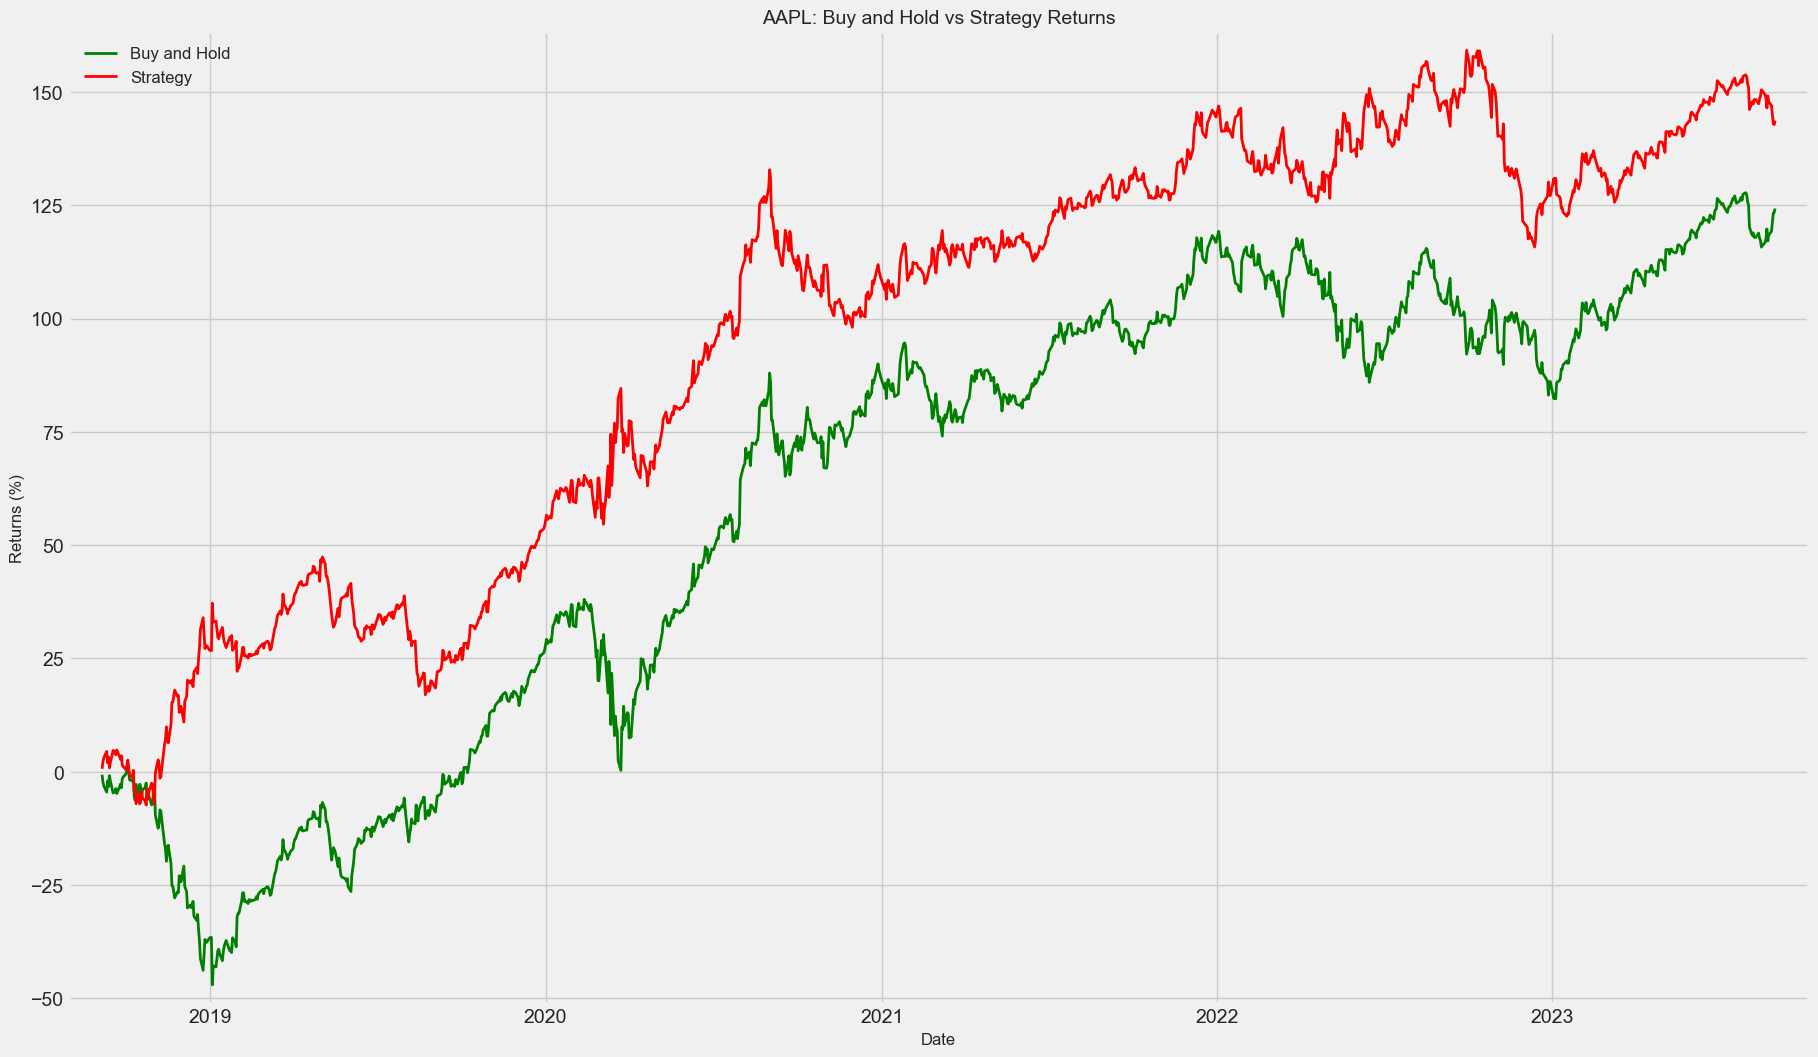

In [19]:
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')
plt.plot(df['returns'], label='Buy and Hold', linewidth=2, color='green')
plt.plot(df['strat_returns'], label='Strategy', linewidth=2, color='red')
plt.title('AAPL: Buy and Hold vs Strategy Returns', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Returns (%)', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.margins(0.02)
plt.show()

%matplotlib inline